In [34]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')

In [36]:
#dolphin总数
print(len(G)) 
#都有哪些节点
print(G.nodes()) 

62
['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [37]:
#边总数
print(len(G.edges()))

#都有哪些边
print(G.edges()) 

159
[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchback'),

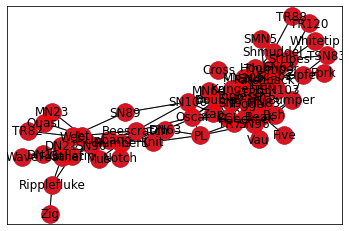

In [38]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()
    
# 可视化
plot_graph(G)

In [39]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)


# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]
D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  

In [40]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

In [41]:
# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2


In [42]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.69023656, 0.        ]), 'Beescratch': array([0.30737372, 0.        ]), 'Bumper': array([0.55093774, 0.        ]), 'CCL': array([0.30654069, 0.        ]), 'Cross': array([0.02832476, 0.        ]), 'DN16': array([0.0328034, 0.       ]), 'DN21': array([0.06867912, 0.        ]), 'DN63': array([0.53732872, 0.        ]), 'Double': array([0.40727219, 0.        ]), 'Feather': array([0.11868513, 0.        ]), 'Fish': array([0.81892065, 0.        ]), 'Five': array([0.2072355, 0.       ]), 'Fork': array([0.62254392, 0.        ]), 'Gallatin': array([0.11298471, 0.        ]), 'Grin': array([0.47152659, 0.        ]), 'Haecksel': array([0.26351987, 0.        ]), 'Hook': array([0.3180839, 0.       ]), 'Jet': array([0.19476346, 0.        ]), 'Jonah': array([0.43163108, 0.        ]), 'Knit': array([0.49016756, 0.        ]), 'Kringel': array([0.28569076, 0.        ]), 'MN105': array([0.65849014, 0.        ]), 'MN23': array([0.15680569, 0.00388764]), 'MN60': arr

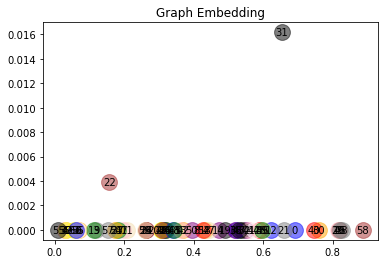

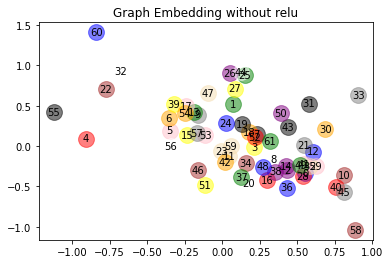

In [44]:
# 不同节点value，绘制不同的颜色
def getValue(value):
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    return colorList[int(value)]


# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    value = -1
    for i in range(len(nodes)):
        node_name = nodes[i]
        value = (value+1)%12
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = getValue(value),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
plot_node(output, 'Graph Embedding without relu')
